# Newton Descent

Newton method or newton-raphson method, is a root-finding algorithm for finding $\alpha$ that satisfies $ f(\alpha) = 0$ 

When applied on the derivative of the function $f^{'}$ it allows to find the root of the derivative $\beta$ that satisfies $f^{'}(\beta) = 0$, this $\beta$ is an extremum, means a maximum or a minimum of the function, those results works on ${\Bbb R}$ and are generalized to ${\Bbb R^n}$ 

This method is constructed by a sequence $x_{n+1} = x_{n} + \Delta_{x_n}$ here the [rate of convergence](https://en.wikipedia.org/wiki/Rate_of_convergence) is quadratic, it goes quicker toward the solution than the rate with the normal gradient descent 

The method is not widely used because it sometimes heavy to compute $\Delta_{x_n}$ that implies the gradient and the hessian matrix (we will see more about it later)

## Plan of this lecon

### 1 - Root finding algorithm
We are going to see in this part how this algorithm help us to find a root of a function
### 2 - Root finding applied to the derivative
If we do apply newton-raphson algorithm for the derivative, it will find where the derivative get to zero, so it will find an exremum and we derive from that the newton descent
### 3 - Applying the newton descent 
We will take the previous example of temperature (elipses) and see how we use newton descent in order to find an extremum

### 1 - Root finding algorithm
#### 1.1 - Pseudo proof
Let consider a differentiable function $f$ such as $\alpha$ is a root of the function ($f(\alpha) = 0$), the expression of the derivative at $\alpha$ is 
$$\begin{align}
\lim\limits_{x\to \alpha} \frac{f(\alpha) - f(x)}{(\alpha - x)} = f^{'}(\alpha) \iff & \lim\limits_{x\to \alpha} \;f(x) = f^{'}(\alpha)(x - \alpha) + f(\alpha)\\
\end{align}$$

if $x_{n+1}\approx \alpha$ and $x_{n}\approx \alpha$ such as $|x_{n+1} - \alpha| < |x_{n} - \alpha|$ this equality $\lim\limits_{x\to \alpha} \;f(x) = 0 = f^{'}(x_{n})(x_{n+1} - x_{n}) + f(x_{n})$ still valid and implies another one $x_{n+1} = x_n - \frac{f(x_{n})}{f^{'}(x_{n})}$ and this is our newton sequence, for more formal proof [check](https://nptel.ac.in/courses/122104019/numerical-analysis/Rathish-kumar/ratish-1/f3node7.html)
#### 1.2 - Applying root finding algorithm on an example
##### 1.2.1 - Steps
We consider the function $f(x)=x^3$
We consider it derivative $f^{'}(x)=3x^2$
We consider a starting point $x_0= -2$
We compute the sequence $x_{n+1} = x_n - \frac{f(x_{n})}{f^{'}(x_{n})}$ until $f(x_{n+1})\approx 0$


##### 1.2.3 - Defining functions 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import ylim, xlim

def f(x):
    return (x)**3
def df(x):
    return 3 * x**2
def plot_line(plt, X1, X2, marker='o', color ='r'):
    x1, x2 = (X1[0], X2[0]), (X1[1], X2[1])
    plt.plot(x1, x2, marker = marker, color = color)
def next_element(f, df, xn):
    xn1 = xn - (f(xn)/df(xn))
    return xn1
def newton_steps(start, f, df, tol =1e-3):
    x0 = start
    X = [(x0, f(x0))]
    while(abs(f(x0)) > tol):
        x1 = next_element(f, df, x0)
        x0 = x1
        X.append((x0, f(x0)))
    return X
def plot_lines(plt, X):
    for i in range(len(X) - 1):
        plot_line(plt, X[i], X[i+1])
    

##### 1.2.4 - Ploting newton method 


The root solution found by newton method is(-0.07803688462124676,-0.0004752255365083931)


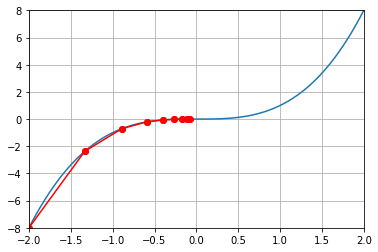

In [2]:
XS = np.linspace(-2,2,100)
YS = np.array([f(x) for x in XS])
xlim(-2,2)
ylim(-8, 8)
x0 = -2
X = newton_steps(x0, f, df)
plt.plot(XS,YS)
plot_lines(plt, X)
plt.grid(True)
xs, ys = X[-1]
print("The root solution found by newton method is" + "(" +str(xs)+","+str(ys)+")")
plt.show()

For more image vizualisation check [wikipedia](https://en.wikipedia.org/wiki/Newton%27s_method)

### 2 - Root finding applied to the derivative
#### 2.1 - Taylor young Decomposition
##### 2.1.1 - Introduction
In this part we are going to use Taylor young formula to extract newton descent formula, but we will explain and pseudo-proof the taylor young formula before using it
##### 2.1.2 - Motivation
I'm sure in high school in some exercice of physics,in pendulas formulas you have considered the following approximations : 


$f\colon\begin{cases}
sin(x) \approx x \;\;\;\;\; \text{when }x\approx0\\
cos(x) \approx \frac{x^2}{2} \;\;\;\;\; \text{when }x\approx0\\
\end{cases}$

I'm sure you are wondering where thoses approximations came from.

In mathematic when we don't know a function we try to use all the toolbox at our disposal to approximate it, that why when we have $n$ points we use concepts like [polynomial interpolation](https://whatis.techtarget.com/definition/polynomial-interpolation) or more advanced machine learning technics.

##### 2.1.2 - Taylor young Formula

In our case, we are trying to approximate a function locally near a point $x_0$ for example.

Since we approximate function with polynoms and a polynom of degree $n$ has as an expression : 
$$P_n(x) = \sum^{k = n}_{k = 0}a_kx^k$$

If we consider $x = x_0 + h$ and i want to approximate $f(x)$ around $x=x_0\iff h\longrightarrow0$  with 
a polynom of degree 1 $P_1(h) = ah + b$ i will write 

$$f(x_0 + h) \approx ah + b$$

We find $b$ by computing $\lim\limits_{h\to 0}f(x_0 + h) = b$ and we find a by noticing that $\forall h \in DP_1^{'}\, P_1^{'}(h) = a$ and specially when $h = 0$ so if $P_1(h)$ is a good approximation of $f$ that $\implies a = f^{'}(x_0)$

If i do the same reasoning for degree $\{2,3,...n\}$ i will obtain this formula 

$$f(x_{0}+h) \approx \sum _{{i=0}}^{n}a_{i}h^{i}$$

and to transform the $\approx$ to $=$ i should take on account the error approximation $R_n(h)$ that verify :
$$ \lim\limits_{h\to 0}\frac{R_n(h)}{h^n} = 0 $$

So the formula we obtain is [Taylor young formula](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_Taylor#Formule_de_Taylor-Young) : 

$$f(x_{0}+h) = \sum _{{i=0}}^{n}a_{i}h^{i} + R_n(h)$$

Those results works on conditons on $f$ and are generalized to $\Bbb R^n$

#### 2.2 - Newton descent formula by Taylor approximation

let take a diffrentiable function f which i am trying to find its extremum, so by using taylor young decomposition  at the second degree near the point $x_n$ we can write 

$$f(x_n+\Delta x) \approx f(x_n)+f'(x_n)\Delta x+\frac 1 2 f''(x_n) \Delta x^2$$

If $x_{n + 1} = x_n+\Delta x $ is a stationary point, it means that the derivative 

$$
\begin{align}
\frac{f(x_n+\Delta x) - f(x_n)}{\Delta x} = \frac{f'(x_n)\Delta x+\frac 1 2 f''(x_n) \Delta x^2}{\Delta x} = 0 &\implies f'(x_n)\Delta x+\frac 1 2 f''(x_n) \Delta x^2 = 0\\
&\implies \Delta x = - \frac{f'(x)}{f''(x)} \\
&\implies \boxed{x_{n + 1} = x_n+ - \frac{f'(x)}{f''(x)}}
\end{align}
$$

And that sequence $x_{n + 1} = x_n+ - \frac{f'(x)}{f''(x)}$ is Newton-raphson sequence applied to the derivativ that will converge (under conditions) to the root of the derivativ $x^{*}\;f^{'}(x^{'}) = 0$, and since this works for $\Bbb R^n$, the equivalent of $f'$ is the greadient $\nabla f$ seen in previous chapter and the equivalent of  $f''(x)$ is the [hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix) that could be understood as the gradient of each element of the gradient (the derivativ of the derivativ) 

### 3 - Applying the newton descent 
#### 3.1 - Temperature example 
So here we consider the same example seen in the gradient chapter we have the function : $\frac{x^2}{2} + y^2 = T(x,y)$ 


The gradient of the function since last time didn't change : $\overrightarrow{grad}T(x, y) = \begin{pmatrix} 
\frac{\partial T(x, y)}{\partial x}  \\
\frac{\partial T(x, y)}{\partial y}  
\end{pmatrix}=\begin{pmatrix} 
x  \\
2y  
\end{pmatrix}
$

And for the hessian matrix $\textbf{H}_{T(x, y)} =  \begin{pmatrix} 
\frac{\partial^2 T(x, y)}{\partial x^2} & \frac{\partial^2 T(x, y)}{\partial x \partial y} \\
\frac{\partial^2 T(x, y)}{\partial y \partial x} &  \frac{\partial^2 T(x, y)}{\partial y^2}
\end{pmatrix}=\begin{pmatrix} 
1 & 0\\
0 &  2 
\end{pmatrix}$   

The iso-energetic levels are given by $T(x,y) = c_{ste} \implies y = \pm{\sqrt{c_{ste} - \frac{x^2}{2} }}$ 
#### 3.2 - Implementation 
Let implement all of the temperature function, its gradient, its hessian, its iso-energetic function levels and the newton-raphson sequence and then apply the sequence on the equipotential lines
##### 3.2.1 - function definitions

In [3]:
#Temperature function Won't be used but if someone want to check something with it
def T(x, y):
    return ((x)**2)/2 + ((y)**2) 

#Gradient of Temperature function 
def gradT(x, y):
    return np.array([x , 2 * y]).reshape(2,1)

#Hessian matrix of Temperature function 
def HT(x, y):
    return np.array([[1 , 0],[0,2]]).reshape(2,2)

#iso energetic function
def f1(x, C = 1):
    val = C - ((x**2)/2)
    if (val >= 0) :
        return np.sqrt(val)
    else:
        return np.nan
def next_element(x, y):
    xn = np.array([x,y]).reshape(2,1)
    xn1 = xn - np.linalg.inv(HT(x, y)) @ gradT(x, y)  #we do H⁻1 since 1/H doesn't exist
    return xn1
def newton_descent(x, y, tol=1e-2):
    xn = np.array([x, y]).reshape(2, 1)
    XS = [xn]
    xn1 = xn + 2
    while (np.linalg.norm(xn1 - xn) > tol):
        xn1 = next_element(xn[0], xn[1])
        xn = xn1
        XS.append(xn)
    return np.array(XS)
def plot_func(f, X, Cs):
    for C in Cs:
        plt.plot(X ,[f(el, C) for el in X ],"black")
        plt.plot(X ,[-f(el, C) for el in X ],"black")
    
    

##### 3.2.2 -Applying newton descent algorith

the method converged in 2 steps


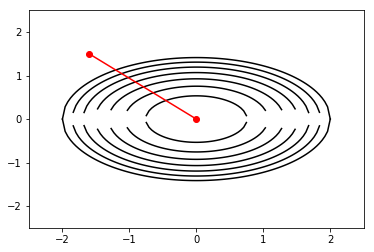

In [4]:
#rate definition
#plt.rcParams['figure.figsize'] = 15,5
alpha_T = 0.2

# levels of energy
Cs = np.linspace(0,2,8)

#Random coordinate space within the considired range
x0 = -1.6
y0 = 1.5

X = np.linspace(-2,2,100)

Xs = newton_descent(x0, y0,  tol=1e-2)

ylim(-2.5,2.5)
xlim(-2.5,2.5)
#plot the function f1 according to the different levels of energy
plot_func(f1, X,Cs)
plt.plot(Xs[:,0],Xs[:,1],"ro-")
print("the method converged in " + str(len(Xs)) + " steps")

    
#construct the sequence 
plt.show()

#### 3.3 - Newton-raphson vs Gradient

If you have followed the chapter on gradient descent for the same example, i imagine you astonished, because to be able to converge just in 2 steps for the gradient descent we called heavy tools (conjugate gradient) to make it possible, and here just at the 1st attempt we did it, so why bother to do the gradient again ? 

Actually here we knew what the hessian matrix was, and more than that it was diagonal, so computing $\textbf{H}^-1$ wasn't costly, but when you don't know what the hessian matrix is and you have to approximate it inverse, is quiet heavy at each iteration to do that, so we prefer method like gradient

Another point we converged here in 2 steps because we were approximating a function of second degree, to see more about how gradient and newton sequence differes on convergence i invite you to check those links [link1](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)  [link2](https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning)
#### The END
Thank you, i wish you liked the explanation for this course !